In [ ]:
#IMPORT DATASET FROM KAGGLE
import kagglehub
import pandas as pd
import os

dataset_path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")
print("Dataset downloaded to:", dataset_path)
final_test=kagglehub.dataset_download("jnegrini/skin-lesions-act-keratosis-and-melanoma")


csv_file = os.path.join(dataset_path, "HAM10000_metadata.csv")
final_test_csv = os.path.join(final_test,"ISIC-images/metadata.csv")

df = pd.read_csv(csv_file)
test_df=pd.read_csv(final_test_csv)

print("First 5 rows:\n", df.head())
print("First 5 rows:\n", test_df.head())


Dataset downloaded to: /kaggle/input/skin-cancer-mnist-ham10000
First 5 rows:
      lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear
First 5 rows:
                   lesion_id      image_id   dx         dx_type   age     sex  \
0  5436e3acbae478396759f0d3  ISIC_0000002  mel  histopathology  60.0  female   
1  5436e3acbae478396759f0d7  ISIC_0000004  mel  histopathology  80.0    male   
2  5436e3adbae478396759f0e9  ISIC_0000013  mel  histopathology  30.0  female   
3  5436e3aebae478396759f0fb  ISIC_0000022  mel  histopathology  55.0  female   
4  5436e3aebae478396759f103  ISIC_0000026  mel  histopathology  30.0  female   

      localization  
0 

In [ ]:
#CIRCULAR MASK FUNCTION
import numpy as np
from PIL import Image
import torch
import torchvision.transforms.functional as TF


def create_circular_mask (h, w, center = None, radius = None):

  if center is None:
    center = (int(w/2), int(h/2))
  if radius is None:
    radius = min(center[0], center[1], w - center[0], h - center[1])
  Y, X = np.ogrid[:h, :w]
  dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y - center[1]) ** 2)
  mask = dist_from_center <= radius
  return mask

class CircularMask:
  def __init__(self, min_scale = 0.9, max_scale = 1.0):
      self.min_scale = min_scale
      self.max_scale = max_scale
  def __call__ (self, img):
    if not isinstance (img, Image.Image):
      img = TF.to_pil_image
    w, h = img.size
    mask = create_circular_mask(h, w)

    img_array = np.array(img)#numpy array
    img_array[~mask]=0 #change pixels to black

    masked_image = Image.fromarray(img_array)
    return masked_image


['ISIC_0028933.jpg', 'ISIC_0028394.jpg', 'ISIC_0027799.jpg', 'ISIC_0028100.jpg', 'ISIC_0027960.jpg']
trainset


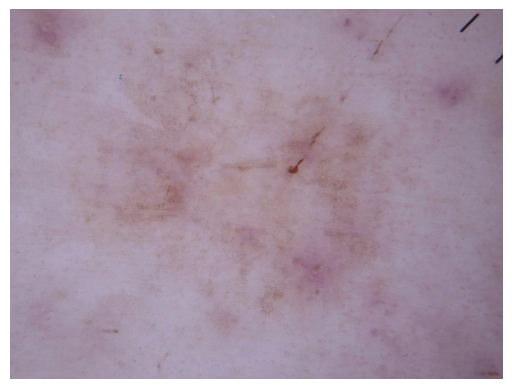

testset


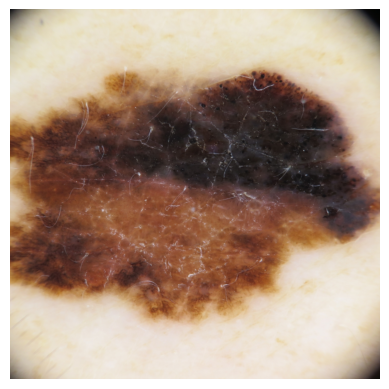

In [ ]:
image_folder = os.path.join(dataset_path, 'HAM10000_images_part_1') #only real change
image_files = os.listdir(image_folder)
test_folder=os.path.join(final_test,"ISIC-images/Images")
test_files=os.listdir(test_folder)
print(image_files[:5])

from PIL import Image
import matplotlib.pyplot as plt

img_path = os.path.join(image_folder, image_files[3])
img_test=os.path.join(test_folder, test_files[3])

img = Image.open(img_path)
test_img=Image.open(img_test)

print("trainset")
plt.imshow(img)
plt.axis('off')
plt.show()
print("testset")
plt.imshow(test_img)
plt.axis('off')
plt.show()

# Show image


In [ ]:
#SORTS THE CLASSES IN THEIR RESPECTIVE FOLDERS IN WORKING HAM10000
import matplotlib.pyplot as plt
import numpy as np

import os
import shutil
import pandas as pd

# load metadata
#NOTE: Changed what's now "df" from previous name "metadata" since I assume that was an old title that wasn't consistent with the rest of the code?? wasn't running earlier on my end. Again, correct me if i'm wrong -A
df = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
test_df = pd.read_csv('/kaggle/input/skin-lesions-act-keratosis-and-melanoma/ISIC-images/metadata.csv')


# source directory
image_src_dirs = [
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/',
    '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2/'
]
test_src_dirs=["/kaggle/input/skin-lesions-act-keratosis-and-melanoma/ISIC-images/Images"]
# target directory
output_dir = '/kaggle/working/HAM10000_images_by_class/'
test_output_dir='/kaggle/working/test_images'

# create output folders
for label in df['dx'].unique():
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)
for label in test_df['dx'].unique():
    os.makedirs(os.path.join(test_output_dir, label), exist_ok=True)
# move images into class folders
for i, row in df.iterrows():
    image_id = row['image_id']
    label = row['dx']
    image_filename = image_id + '.jpg'

    found = False
    for src_dir in image_src_dirs:
        src_path = os.path.join(src_dir, image_filename)
        if os.path.exists(src_path):
            dst_path = os.path.join(output_dir, label, image_filename)
            shutil.copy2(src_path, dst_path)
            found = True
            break

for i, row in test_df.iterrows():
    image_id = row['image_id']
    label = row['dx']
    image_filename = image_id + '.jpg'

    found = False
    for src_dir in test_src_dirs:
        src_path = os.path.join(src_dir, image_filename)
        if os.path.exists(src_path):
            dst_path = os.path.join(test_output_dir, label, image_filename)
            shutil.copy2(src_path, dst_path)
            found = True
            break


Distribution of classes in the Training set:
{'nv': 6705, 'mel': 1113, 'bkl': 1099, 'bcc': 514, 'akiec': 327, 'vasc': 142, 'df': 115}


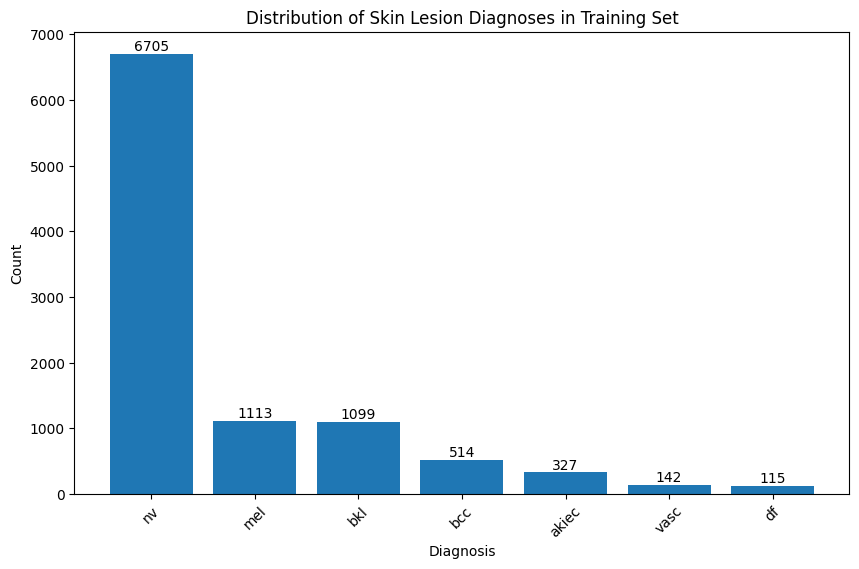

In [ ]:
#PLOTTING DATA DISTRIBUTION
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_data_distribution(df, title):

  # Calculate class distribution from the 'dx' column
  class_distribution = df['dx'].value_counts().to_dict()
  class_names = list(class_distribution.keys())
  label_counts = list(class_distribution.values())

  print(f"Distribution of classes in the {title} set:")
  print(class_distribution)
  plt.figure(figsize=(10, 6))
  bars = plt.bar(class_names, label_counts)
  plt.title(f'Distribution of Skin Lesion Diagnoses in {title} Set')
  plt.xlabel('Diagnosis')
  plt.ylabel('Count')
  plt.xticks(rotation=45)

  # Add count labels on top of the bars
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

  plt.show()

plot_data_distribution(df, "Training")


In [ ]:
#plot_data_distribution(test_metadata, "Testing")

dx
mel      1113
bcc       514
akiec     327
Name: count, dtype: int64
dx
nv      6705
bkl     1099
vasc     142
df       115
Name: count, dtype: int64


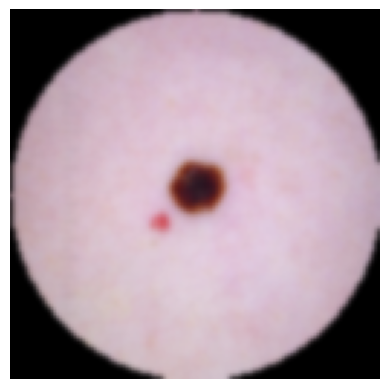

malignant train


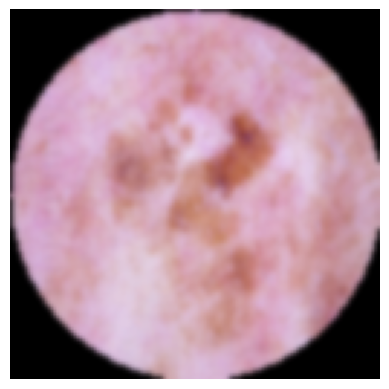

benign train
dx
mel      900
akiec    600
bcc      600
Name: count, dtype: int64
dx
bkl     600
vasc    275
df      126
Name: count, dtype: int64


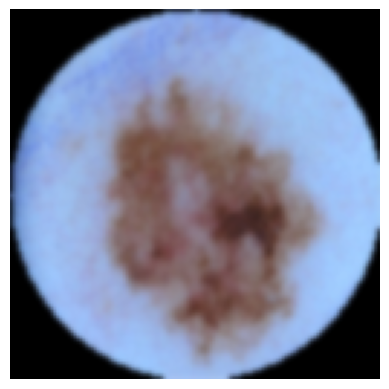

malignant test


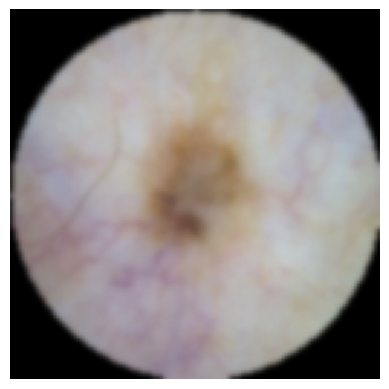

benign test
     lesion_id      image_id   dx dx_type   age     sex     localization  \
0  HAM_0000871  ISIC_0025964  mel   histo  40.0  female            chest   
1  HAM_0000871  ISIC_0030623  mel   histo  40.0  female            chest   
2  HAM_0000040  ISIC_0027190  mel   histo  80.0    male  upper extremity   
3  HAM_0005678  ISIC_0031023  mel   histo  60.0    male            chest   
4  HAM_0005678  ISIC_0028086  mel   histo  60.0    male            chest   

   label                                         image_path  \
0      1  /kaggle/working/HAM10000_images_by_class/mel/I...   
1      1  /kaggle/working/HAM10000_images_by_class/mel/I...   
2      1  /kaggle/working/HAM10000_images_by_class/mel/I...   
3      1  /kaggle/working/HAM10000_images_by_class/mel/I...   
4      1  /kaggle/working/HAM10000_images_by_class/mel/I...   

                                               image  
0  <PIL.Image.Image image mode=RGB size=128x128 a...  
1  <PIL.Image.Image image mode=RGB size=12

In [ ]:
#PREPROCESS FOR BASELINE MODEL
import numpy as np
import pandas as pd
import os
from os.path import basename
from PIL import Image
from skimage.color import rgb2gray
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from PIL import ImageFilter
from sklearn.preprocessing import StandardScaler

#parameters
image_dir = "/kaggle/working/HAM10000_images_by_class"
test_image_dir="/kaggle/working/test_images"
csv_path = "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv"
test_csv_path="/kaggle/input/skin-lesions-act-keratosis-and-melanoma/ISIC-images/metadata.csv"
target_labels = ['mel', 'akiec', 'bcc', 'nv', 'bkl',   'df', 'vasc']
image_size = (128, 128)

def load_metadata(csv_path, target_labels):
    df = pd.read_csv(csv_path)
    df = df[df['dx'].isin(target_labels)].copy()
    df['label'] = df['dx'].map({'mel': 1, 'akiec':1,'bcc':1, 'nv': 0, 'bkl':0, 'df':0,'vasc':0})
    return df.reset_index(drop=True)

metadata = load_metadata(csv_path, target_labels)
metadata = pd.DataFrame(metadata)
test_metadata=load_metadata(test_csv_path, target_labels)
test_metadata=pd.DataFrame(test_metadata)

def new_df(metadata, image_dir, traindata):
    malignant_df = metadata[metadata['label'] == 1].copy()
    benign_df = metadata[metadata['label'] == 0].copy()

    print(malignant_df['dx'].value_counts())
    print(benign_df['dx'].value_counts())

    # update image_path to include the class subdirectory
    for df in [malignant_df, benign_df]:
        df['image_path'] = df.apply(
            lambda row: os.path.join(image_dir, row['dx'], row['image_id'] + '.jpg'), axis=1
        )
        df = df[df['image_path'].apply(lambda x: os.path.exists(x))]

    # load and preprocess images, store directly in the DF
    def load_and_preprocess(paths):
        imgs = [CircularMask()(Image.open(path).resize(image_size)) for path in paths]
        imgs = [img.filter(ImageFilter.GaussianBlur(radius=1)) for img in imgs]
        return imgs

    malignant_df['image'] = load_and_preprocess(malignant_df['image_path'])
    benign_df['image'] = load_and_preprocess(benign_df['image_path'])

    plt.imshow(malignant_df['image'].iloc[0])
    plt.axis('off')
    plt.show()
    print("malignant", "train" if traindata else "test")

    plt.imshow(benign_df['image'].iloc[0])
    plt.axis('off')
    plt.show()
    print("benign", "train" if traindata else "test")

    # return combined DF
    combined_df = pd.concat([malignant_df, benign_df]).reset_index(drop=True)
    return combined_df

train_df=new_df(metadata, image_dir, True)
testdata_df=new_df(test_metadata, test_image_dir, False)

print(train_df.head())

In [ ]:
#BASELINE MODEL
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
"""
# combine all images and create labels
all_images = benign_images + malignant_images
labels = [0]*len(benign_images) + [1]*len(malignant_images)

test_all_images = test_benign_images + test_malignant_images
test_labels = [0]*len(test_benign_images) + [1]*len(test_malignant_images)
"""


#extracts features from the images
def extract_hog_features(image_list):
    features = []
    for img in image_list:
        gray = rgb2gray(np.array(img))
        hog_feat = hog(gray, pixels_per_cell=(32, 32), cells_per_block=(2, 2), feature_vector=True)
        features.append(hog_feat)
    return np.array(features)

X = extract_hog_features(train_df['image'])
scalerx = StandardScaler()
X = scalerx.fit_transform(X)
y=train_df['label'].values


test_X=extract_hog_features(testdata_df['image'])
test_scalar = StandardScaler()
test_X = test_scalar.fit_transform(test_X)
test_y = testdata_df['label'].values

#splitting the dataset for baseline movel
x_train, x_val, y_train, y_val= train_test_split(X, y, test_size=0.15, random_state=42)

#resampling because of dataset imbalance
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#train svm model
model=svm.SVC(kernel='rbf', class_weight='balanced', C=1, random_state=42).fit(x_train_resampled, y_train_resampled)

y_predict=model.predict(x_val)
test_predict=model.predict(test_X)
classification_report_str = classification_report(y_val, y_predict)

classification_report_str_test = classification_report(test_y, test_predict)
print("Classification Report: \n", classification_report_str)
print("Accuracy: ", accuracy_score(y_val, y_predict))
print("Test Classification Report: \n", classification_report_str_test)
print("Test Accuracy: ", accuracy_score(test_y, test_predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1195
           1       0.47      0.49      0.48       308

    accuracy                           0.78      1503
   macro avg       0.67      0.67      0.67      1503
weighted avg       0.78      0.78      0.78      1503

Accuracy:  0.780439121756487
Test Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.79      0.50      1001
           1       0.77      0.34      0.47      2100

    accuracy                           0.48      3101
   macro avg       0.57      0.56      0.48      3101
weighted avg       0.64      0.48      0.48      3101

Test Accuracy:  0.48274750080619155


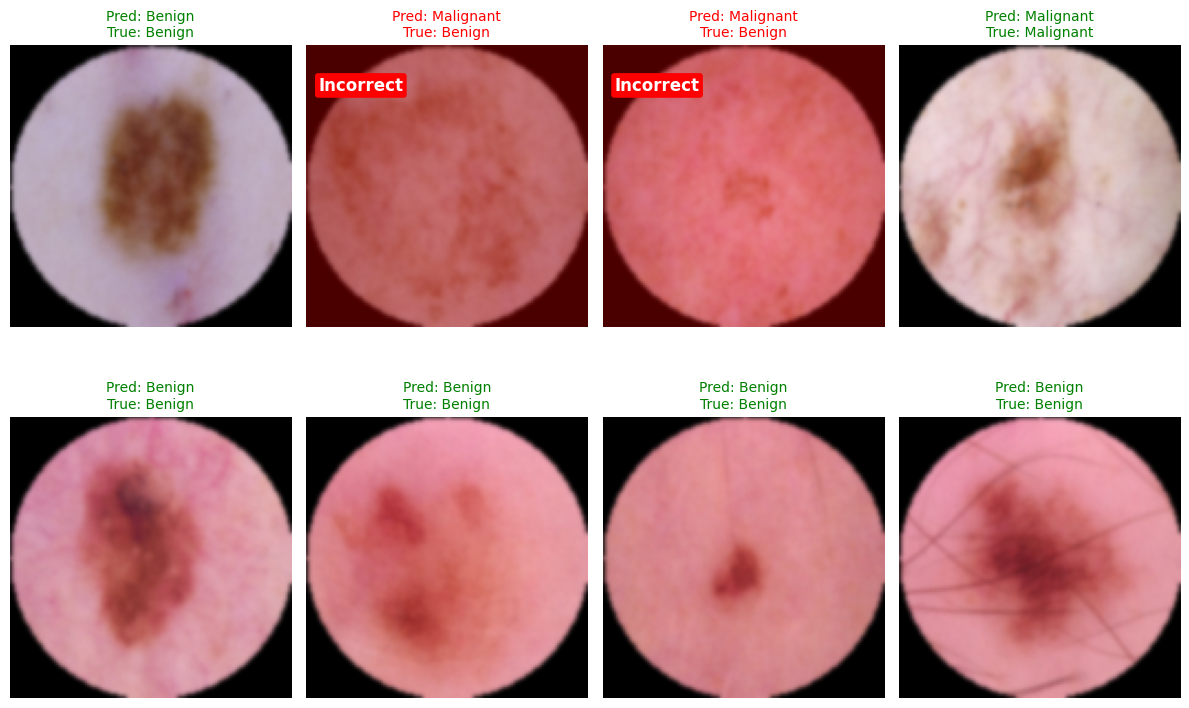

In [ ]:
#VISUALIZATION PREDICTIONS
def visualize_predictions(model, X_features, y_true, images, class_names, num_samples=10):

    import random
    indices = random.sample(range(len(images)), num_samples)
    X_subset = X_features[indices]
    y_subset_true = y_true[indices]
    imgs_subset = [images.iloc[i] for i in indices]  # DataFrame column

    preds = model.predict(X_subset)

    plt.figure(figsize=(12, 8))
    for i, (img, true_label, pred_label) in enumerate(zip(imgs_subset, y_subset_true, preds)):
        plt.subplot(2, num_samples//2, i+1)
        plt.imshow(img)
        plt.axis('off')
        color='green'
        if true_label != pred_label:
          color='red'
          plt.imshow(np.full_like(img, fill_value=[1.0, 0, 0], dtype=np.float32), alpha=0.3)
          plt.text(5, 20, "Incorrect", color='white', fontsize=12, weight='bold',
                  bbox=dict(facecolor='red', edgecolor='none', boxstyle='round,pad=0.2'))

        plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}",
                  color=color, fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage after training:
class_map = {0: 'Benign', 1: 'Malignant'}
visualize_predictions(model, X, y, train_df['image'], class_map, num_samples=8)
